The "Broken" Weather Station
Background: A mountain weather station has been offline for months and recently sent a burst of messy data. Before we can use the data and connect it to streamflow, it must be repaired and the Pandas toolkit can support this.

Task 1: The Raw Feed
Load the .csv of rainfall values and convert into a Pandas DataFrame named Rainfall_mm. The data can be found here:

data/snotel_rainfall_data.csv

Check your work: Use .head() and .describe(). Does the data look right?

In [1]:
import pandas as pd

# The "Broken" Weather Station

Background: A mountain weather station has been offline for months and recently sent a burst of messy data. Before we can use the data and connect it to streamflow, it must be repaired and the Pandas toolkit can support this.

## Task 1: The Raw Feed 
Load the .csv of rainfall values and convert into a Pandas DataFrame named Rainfall_mm. The data can be found here:

```data/snotel_rainfall_data.csv```

Check your work: Use .head() and .describe(). Does the data look right?


In [2]:
# Load rainfall data
Rainfall_mm = pd.read_csv("data/snotel_rainfall_data.csv") # Load the dataset

Rainfall_mm.head(3)

Rainfall_mm.describe()

,Date,Precip_in
count,61,58
unique,60,32
top,2024-01-16,0.0
freq,2,27


In [3]:
Rainfall_mm.head(20)

,Date,Precip_in
0,2024-01-01,0.14028030062619642
1,2024-01-02,0.6590180328421851
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,0.3757291395473922
5,2024-01-06,0.0
6,2024-01-07,1.0954577625968716
7,2024-01-08,0.0
8,2024-01-09,0.0
9,2024-01-10,0.18657649912973773


## Task 2: Using Pandas Tools to make the data readable

**coerce** turns anything it can't read as a number (like 'T' or 'error') into NaN


```df['colname'] = pd.to_numeric(df['colname'], errors='coerce')```

Apply this to your dataset and then try .describe()

In [58]:
Rainfall_mm['Precip_in'] = pd.to_numeric(Rainfall_mm['Precip_in'], errors='coerce') 
Rainfall_mm.describe()
# remove values greater than 20 and less than 0 from the Precip_in column
Rainfall_mm_cleaned = Rainfall_mm[(Rainfall_mm['Precip_in'] <= 20) & (Rainfall_mm['Precip_in'] >= 0)]
Rainfall_mm_cleaned.head()

,Date,Precip_in
0,2024-01-01,0.140280
1,2024-01-02,0.659018
2,2024-01-03,0.000000
3,2024-01-04,0.000000
4,2024-01-05,0.375729


In [12]:
streamflow_cfs.head()   


0    10.25
1    10.70
2    13.30
3    10.10
4    10.00
Name: Streamflow_cfs, dtype: float64

## Task 3: Load the discharge data

Load the .csv of rainfall values and convert into a Pandas Dataframe named streamflow_cfs. The data can be found here:

```data/streamflow_data.csv```

Check your work: Use .head() and .describe(). Does the data look right? How can you extract more useful statistics? Show this.

In [61]:
streamflow = pd.read_csv("data/streamflow_data.csv")
streamflow['Streamflow_cfs'] = pd.to_numeric(streamflow['Streamflow_cfs'], errors='coerce') 
streamflow.describe()




,Streamflow_cfs
count,54.000000
mean,40.058333
std,369.096212
min,-999.000000
25%,10.100000
50%,10.600000
75%,13.900000
max,2510.000000


## Task 4: Clean and repair the data

The sensor cut out during the storm and we now have NaN **AND** -999 values. This prevents us from plotting or otherwise using the time series. Are there any other values we should remove?

Explore different methods and select one that fits the data.

Explore .dropna() (delete the gap), .fillna() with the mean, and .interpolate() for a smoother hydrograph for both datasets.

Note, it may be useful to create a new Pandas DataFrame to compare differences. 

In [62]:
# remove NaN and -999 values from the Streamflow_cfs column
streamflow_cfs_cleaned = streamflow[streamflow['Streamflow_cfs'] >= 0]
    # & (streamflow_cfs['Streamflow_cfs'].notna())]
streamflow_cfs_cleaned.describe()   
     




,Streamflow_cfs
count,53.000000
mean,59.663208
std,343.071082
min,10.000000
25%,10.100000
50%,10.700000
75%,13.950000
max,2510.000000


In [63]:
# create a data set replacing the removed values with the mean of the column
streamflow_cfs_filled = streamflow_cfs_cleaned.copy()
streamflow_cfs_filled['Streamflow_cfs'] = streamflow_cfs_filled['Streamflow_cfs'].replace(-999, streamflow_cfs_filled['Streamflow_cfs'].mean())
streamflow_cfs_filled['Streamflow_cfs'] = streamflow_cfs_filled['Streamflow_cfs'].fillna(streamflow_cfs_filled['Streamflow_cfs'].mean())
streamflow_cfs_filled.head()   

,Date,Streamflow_cfs
0,2024-01-01,10.25
1,2024-01-02,10.70
2,2024-01-03,13.30
3,2024-01-04,10.10
4,2024-01-05,10.00


In [48]:
# create a data set replacing removed values with interpolated values for streamflow using .interpolate()
streamflow_cfs_interpolated = streamflow_cfs_cleaned.copy()
# replace -999 with NaN to prepare for interpolation         
streamflow_cfs_interpolated['Streamflow_cfs'] = streamflow_cfs_interpolated['Streamflow_cfs'].fillna(streamflow_cfs_interpolated['Streamflow_cfs'].interpolate(method='linear'))          
streamflow_cfs_interpolated.describe()  

,Streamflow_cfs
count,53.000000
mean,59.663208
std,343.071082
min,10.000000
25%,10.100000
50%,10.700000
75%,13.950000
max,2510.000000


In [74]:
#remove NaN and -999 values from the precipitation data
Rainfall_mm_cleaned = Rainfall_mm[(Rainfall_mm['Precip_in'] >= 0) & (Rainfall_mm['Precip_in'].notna())]
Rainfall_mm_cleaned.describe()  
# create a data set replacing the removed values with the mean of the column
Rainfall_mm_filled = Rainfall_mm_cleaned.copy()
Rainfall_mm_filled['Precip_in'] = Rainfall_mm_filled['Precip_in'].replace(-999, Rainfall_mm_filled['Precip_in'].mean())
Rainfall_mm_filled['Precip_in'] = Rainfall_mm_filled['Precip_in'].fillna(Rainfall_mm_filled['Precip_in'].mean())
Rainfall_mm_filled.describe()        
# create a data set replacing the removed values with interpolated values
Rainfall_mm_interpolated = Rainfall_mm_cleaned.copy()
Rainfall_mm_interpolated['Precip_in'] = Rainfall_mm_interpolated['Precip_in'].fillna(Rainfall_mm_interpolated['Precip_in'].interpolate(method='linear')) 
Rainfall_mm_interpolated.describe()

# find and remove one duplicate date in the rainfall data
duplicate_dates = Rainfall_mm_interpolated[Rainfall_mm_interpolated.duplicated(subset='Date', keep=False)]
print(duplicate_dates)
Rainfall_mm_interpolated = Rainfall_mm_interpolated.drop_duplicates(subset='Date', keep='first')
Rainfall_mm_interpolated.describe() 

          Date  Precip_in
15  2024-01-16        0.0
16  2024-01-16        0.0


,Precip_in
count,54.000000
mean,9.719315
std,67.982160
min,0.000000
25%,0.000000
50%,0.120703
75%,0.730634
max,500.000000


## Task 5: Join Pandas DataFrames

We often want to relate data to another, and having all the data in once centralized data frame supports this comparison. Create a new Pandas DataFrame named:
* rainfall_methods fill it with the three rainfall dataframes we cleaned
* streamflow_methods and fill it with the three streamflow dataframes we cleaned


In [67]:
#create merged data set of streamflow_cfs cleaned, streamfall_cfs filled, and streamflow_cfs interpolated with date as the index
streamflow_methods = pd.DataFrame({
    'Streamflow_cfs_cleaned': streamflow_cfs_cleaned['Streamflow_cfs'],
    'Streamflow_cfs_filled': streamflow_cfs_filled['Streamflow_cfs'],
    'Streamflow_cfs_interpolated': streamflow_cfs_interpolated['Streamflow_cfs']
})
streamflow_methods.head()  
# set date as the index
streamflow_methods.index = streamflow_cfs_cleaned['Date']
streamflow_methods.head()



,Streamflow_cfs_cleaned,Streamflow_cfs_filled,Streamflow_cfs_interpolated
Date,,,
2024-01-01,10.25,10.25,10.25
2024-01-02,10.70,10.70,10.70
2024-01-03,13.30,13.30,13.30
2024-01-04,10.10,10.10,10.10
2024-01-05,10.00,10.00,10.00


In [75]:
# create a data set with the cleaned, filled, and interpolated rainfall data
rainfall_methods = pd.DataFrame({
    'Precip_in_cleaned': Rainfall_mm_cleaned['Precip_in'],
    'Precip_in_filled': Rainfall_mm_filled['Precip_in'],
    'Precip_in_interpolated': Rainfall_mm_interpolated['Precip_in']
})
rainfall_methods.head()

# set date as the index
rainfall_methods.index = Rainfall_mm_cleaned['Date']
rainfall_methods.head()


,Precip_in_cleaned,Precip_in_filled,Precip_in_interpolated
Date,,,
2024-01-01,0.140280,0.140280,0.140280
2024-01-02,0.659018,0.659018,0.659018
2024-01-03,0.000000,0.000000,0.000000
2024-01-04,0.000000,0.000000,0.000000
2024-01-05,0.375729,0.375729,0.375729


## Task 6: Plot the rainfall and streamflow data to visualize trends and relationships.

Use Pandas simple plotting functionality to separately plot the two dataframes. Which interpolation method do you like? 

<Axes: title={'center': 'Precipitation Data with Different Methods'}, xlabel='Date', ylabel='Precipitation (inches)'>

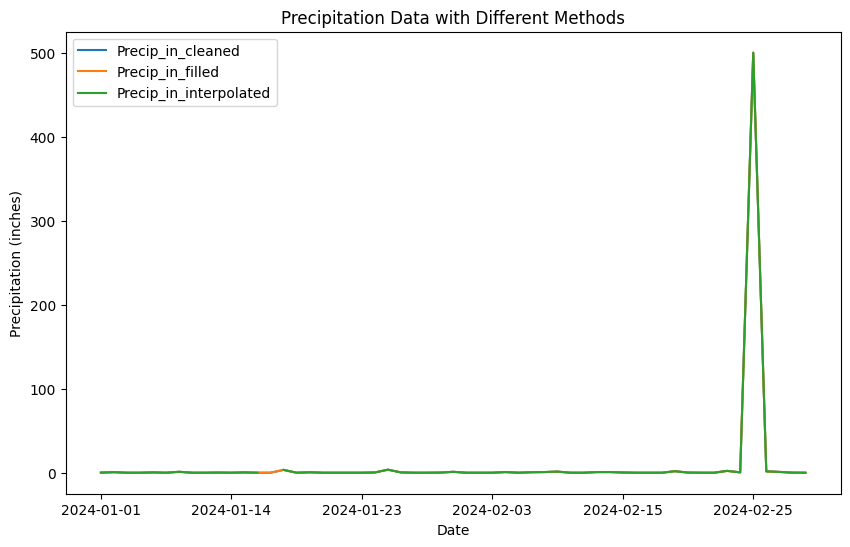

In [78]:
# create a plot with df.plot() with the cleaned, filled, and interpolated precipitation data 
rainfall_methods.plot(figsize=(10,6), title='Precipitation Data with Different Methods', ylabel='Precipitation (inches)', xlabel='Date')


KeyError: 'Date'

## Task 7: Combining DataFrames

From the plots above, choose your most representative gap filling dataframe for rainfall and streamflow, and combine them into a rain_flow_df DataFrame.

## Task 8: Calculate the monthly statistics of the rainfall and discharge

Calculate the monthly total, mean daily (for each month), and the maximum (for each month) rainfall and flow. 

## Task 9: Data Corrections

We want to put the data into a streamflow model, but it requires precipitation to be in mm and streamflow to be in CMS (cubic meters per second). Create a new dataframe called rain_flow_SI_df that converts the previous dataframe to SI units.

## Task 10: Event diagnostics

A key element of hydroinformatics is to identify key events and learn from them. Here, we have two tasks.
* Create a new column and programatically label each day as 'Dry', 'Light Rain', or 'Heavy Rain' based on the precipitaiton colum.
* From our rain_flow_SI_df, create a new Pandas DataFrame called storm_df that programatically selects the streamflow and precipitation data for 5 days before and after the peak flow event.

## Task 11: Quick Data Visualziation

Use the pandas plot function to conduct a quick visualization of precipitation and streamflow. Do they seem coorelated? Any glaring errors?